In [3]:
import numpy as np
import pandas as pd
df = pd.read_excel("avalanche_discrete3.xlsx")
df.head()

,inventory,Elevation,Slope,Aspect,Plan Curvature,Profile Curvature,Topographic Wetness Index,Terrain Roughness Index,Topographic Position Index,Proximity to Road,Proximity to Stream,Average Wind Speed,Average Min Temperature,Average Max Temperature,Average Solar Radiation,Annual Precipitation,Annual Mean Temperature,Lithology,Land Use
0,0,3,5,5,4,2,2,4,4,2,1,1,4,5,3,2,5,3,3
1,0,1,3,6,4,2,2,4,4,1,1,1,5,6,2,3,6,3,3
2,0,2,2,7,4,2,2,4,4,1,1,1,5,6,1,2,5,3,3
3,0,1,1,5,4,2,2,3,5,1,1,1,6,6,1,4,6,4,1
4,0,2,3,0,4,3,3,4,4,1,1,1,5,6,2,2,5,3,3


### Independent Variables

In [4]:
X = df.iloc[:,1:].values
X.shape

(3762, 18)

### Dependent Variable

In [5]:
y = df.iloc[:,0].values
y.shape

(3762,)

### Column Names

In [6]:
column_names = df.iloc[:,1:].columns
column_names

Index(['Elevation', 'Slope', 'Aspect', 'Plan Curvature', 'Profile Curvature',
       'Topographic Wetness Index', 'Terrain Roughness Index',
       'Topographic Position Index', 'Proximity to Road',
       'Proximity to Stream', 'Average Wind Speed', 'Average Min Temperature',
       'Average Max Temperature', 'Average Solar Radiation',
       'Annual Precipitation', 'Annual Mean Temperature', 'Lithology',
       'Land Use'],
      dtype='object')

### Train - Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=43, stratify=y)

### Importing Libraries

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, roc_curve, roc_auc_score, auc,precision_recall_curve, average_precision_score
import xgboost as xgb

### Random Forest

In [9]:
RFC = RandomForestClassifier(random_state=42,n_estimators=200,criterion='gini', max_depth=50,
                            min_samples_split=10)

RFC.fit(X_train,y_train)

print("score train RFC: ",RFC.score(X_train,y_train))
print("score test RFC: ",RFC.score(X_test,y_test))

score train RFC:  0.9491074819597417
score test RFC:  0.9238263950398583


              precision    recall  f1-score   support

           0       0.94      0.91      0.92       565
           1       0.91      0.94      0.93       564

    accuracy                           0.92      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.92      0.92      0.92      1129

accuracy RFC:  0.9238263950398583
precision RFC:  0.9092465753424658
recall RFC:  0.9414893617021277
f1 score RFC:  0.9250871080139373


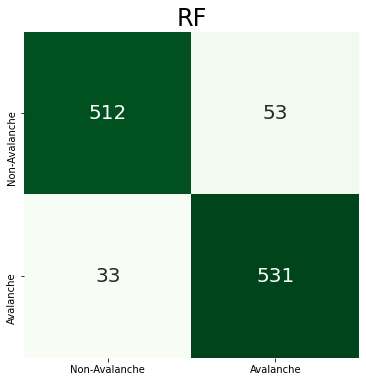

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_RFC = RFC.predict(X_test)
df_cm_RFC= pd.DataFrame(confusion_matrix(y_test,y_pred_RFC), index = [i for i in ["Non-Avalanche",  'Avalanche']],columns = [i for i in ["Non-Avalanche",  'Avalanche']])
fig = plt.figure(figsize=(6, 6))
plt.title('RF', size=24)
sns.heatmap(df_cm_RFC, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_RF.png', dpi=200,bbox_inches='tight')

print(classification_report(y_test,y_pred_RFC)) 
print("accuracy RFC: ", accuracy_score(y_test,y_pred_RFC)) 
print("precision RFC: ", precision_score(y_test,y_pred_RFC)) 
print("recall RFC: ", recall_score(y_test,y_pred_RFC)) 
print("f1 score RFC: ", f1_score(y_test,y_pred_RFC)) 

In [11]:
y_pred_prob_RFC = RFC.predict_proba(X_test)[:,1]
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, y_pred_prob_RFC)
roc_auc_RFC = auc(fpr_RFC, tpr_RFC)

### Gradient Boosting

In [12]:
GB= GradientBoostingClassifier()

GB.fit(X_train,y_train)

print("score train GB: ",GB.score(X_train,y_train))
print("score test GB: ",GB.score(X_test,y_test))

score train GB:  0.9365742499050512
score test GB:  0.9202834366696191


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       565
           1       0.91      0.93      0.92       564

    accuracy                           0.92      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.92      0.92      0.92      1129

accuracy GB:  0.9202834366696191
precision GB:  0.9114583333333334
recall GB:  0.9308510638297872
f1 score GB:  0.9210526315789473


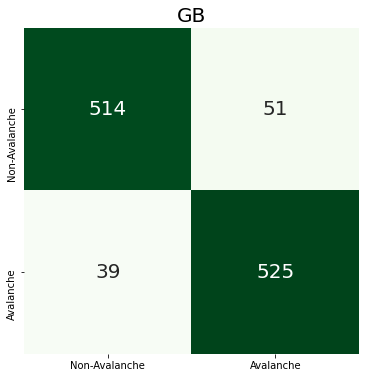

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_GB = GB.predict(X_test)
df_cm_GB= pd.DataFrame(confusion_matrix(y_test,y_pred_GB), index = [i for i in ["Non-Avalanche",  'Avalanche']],columns = [i for i in ["Non-Avalanche",  'Avalanche']])
#df_cm_GB=pd.DataFrame([[61,  8],[ 8, 60]],index = [i for i in ["Non-Flood",  'Flood']], columns = [i for i in ["Non-Flood",  'Flood']])
fig = plt.figure(figsize=(6, 6))
plt.title('GB', size=20)
sns.heatmap(df_cm_GB, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_GB.png', dpi=200,bbox_inches='tight')
print(classification_report(y_test,y_pred_GB)) 
print("accuracy GB: ", accuracy_score(y_test,y_pred_GB)) 
print("precision GB: ", precision_score(y_test,y_pred_GB)) 
print("recall GB: ", recall_score(y_test,y_pred_GB)) 
print("f1 score GB: ", f1_score(y_test,y_pred_GB)) 

In [14]:
y_pred_prob_GB = GB.predict_proba(X_test)[:,1]
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_test, y_pred_prob_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

### AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
AB= AdaBoostClassifier(n_estimators=100, learning_rate=1,algorithm='SAMME.R')

AB.fit(X_train,y_train)

print("score train AB: ",AB.score(X_train,y_train))
print("score test AB: ",AB.score(X_test,y_test))

score train AB:  0.9156855298139005
score test AB:  0.9131975199291408


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       565
           1       0.91      0.91      0.91       564

    accuracy                           0.91      1129
   macro avg       0.91      0.91      0.91      1129
weighted avg       0.91      0.91      0.91      1129

accuracy AB:  0.9131975199291408
precision AB:  0.911660777385159
recall AB:  0.9148936170212766
f1 score AB:  0.9132743362831858


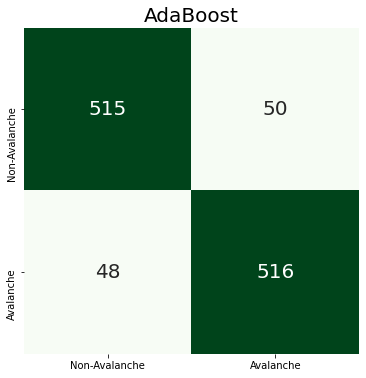

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_AB = AB.predict(X_test)
df_cm_AB= pd.DataFrame(confusion_matrix(y_test,y_pred_AB), index = [i for i in ["Non-Avalanche",  'Avalanche']],columns = [i for i in ["Non-Avalanche",  'Avalanche']])
fig = plt.figure(figsize=(6, 6))
plt.title('AdaBoost', size=20)
sns.heatmap(df_cm_AB, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_AB.png', dpi=200,bbox_inches='tight')
print(classification_report(y_test,y_pred_AB)) 
print("accuracy AB: ", accuracy_score(y_test,y_pred_AB)) 
print("precision AB: ", precision_score(y_test,y_pred_AB)) 
print("recall AB: ", recall_score(y_test,y_pred_AB)) 
print("f1 score AB: ", f1_score(y_test,y_pred_AB)) 

In [17]:
y_pred_prob_AB = AB.predict_proba(X_test)[:,1]
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_test, y_pred_prob_AB)
roc_auc_AB = auc(fpr_AB, tpr_AB)

### XGBoost

In [18]:
XGB = xgb.XGBClassifier()

XGB.fit(X_train,y_train)

print("score train XGB: ",XGB.score(X_train,y_train))
print("score test XGB: ",XGB.score(X_test,y_test))

C:\Users\muzaf\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score train XGB:  0.9908849221420433
score test XGB:  0.9149689991142604


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       565
           1       0.91      0.92      0.92       564

    accuracy                           0.91      1129
   macro avg       0.91      0.91      0.91      1129
weighted avg       0.91      0.91      0.91      1129

accuracy XGB:  0.9149689991142604
precision XGB:  0.9119718309859155
recall XGB:  0.9184397163120568
f1 score XGB:  0.9151943462897527


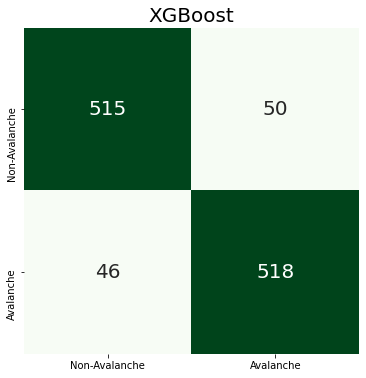

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_XGB = XGB.predict(X_test)
df_cm_XGB= pd.DataFrame(confusion_matrix(y_test,y_pred_XGB), index = [i for i in ["Non-Avalanche",  'Avalanche']],columns = [i for i in ["Non-Avalanche",  'Avalanche']])
#df_cm_XGB=pd.DataFrame([[59,  10],[ 7, 61]],index = [i for i in ["Non-Flood",  'Flood']],columns = [i for i in ["Non-Flood",  'Flood']])
fig = plt.figure(figsize=(6, 6))
plt.title('XGBoost', size=20)
sns.heatmap(df_cm_XGB, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_XGB.png', dpi=200,bbox_inches='tight')

print(classification_report(y_test,y_pred_XGB)) 
print("accuracy XGB: ", accuracy_score(y_test,y_pred_XGB)) 
print("precision XGB: ", precision_score(y_test,y_pred_XGB)) 
print("recall XGB: ", recall_score(y_test,y_pred_XGB)) 
print("f1 score XGB: ", f1_score(y_test,y_pred_XGB)) 

In [20]:
y_pred_prob_XGB = XGB.predict_proba(X_test)[:,1]
fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test, y_pred_prob_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

### LightGBM

In [21]:
import lightgbm as lgb
LGB = lgb.LGBMClassifier()
LGB.fit(X_train,y_train)

print("score train LGB: ",LGB.score(X_train,y_train))
print("score test LGB: ",LGB.score(X_test,y_test))

score train LGB:  0.9821496391948348
score test LGB:  0.9185119574844995


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       565
           1       0.91      0.93      0.92       564

    accuracy                           0.92      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.92      0.92      0.92      1129

accuracy LGB:  0.9185119574844995
precision LGB:  0.9111498257839721
recall LGB:  0.9273049645390071
f1 score LGB:  0.9191564147627417


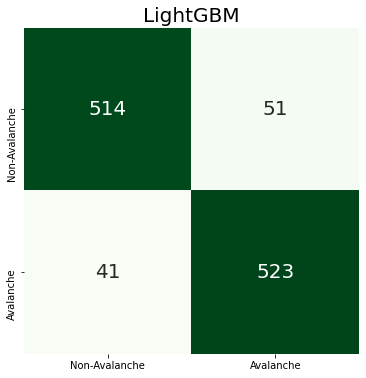

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_LGB = LGB.predict(X_test)
df_cm_LGB= pd.DataFrame(confusion_matrix(y_test,y_pred_LGB), index = [i for i in ["Non-Avalanche",  'Avalanche']],columns = [i for i in ["Non-Avalanche",  'Avalanche']])
#df_cm_LGB=pd.DataFrame([[62,  7],[ 7, 61]],index = [i for i in ["Non-Flood",  'Flood']],columns = [i for i in ["Non-Flood",  'Flood']])
fig = plt.figure(figsize=(6, 6))
plt.title('LightGBM', size=20)
sns.heatmap(df_cm_LGB, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_LGB.png', dpi=200,bbox_inches='tight')

print(classification_report(y_test,y_pred_LGB)) 
print("accuracy LGB: ", accuracy_score(y_test,y_pred_LGB)) 
print("precision LGB: ", precision_score(y_test,y_pred_LGB)) 
print("recall LGB: ", recall_score(y_test,y_pred_LGB)) 
print("f1 score LGB: ", f1_score(y_test,y_pred_LGB)) 

In [23]:
y_pred_prob_LGB = LGB.predict_proba(X_test)[:,1]
fpr_LGB, tpr_LGB, thresholds_LGB = roc_curve(y_test, y_pred_prob_LGB)
roc_auc_LGB = auc(fpr_LGB, tpr_LGB)

### NGBoost

In [24]:
from ngboost import NGBClassifier
NGB = NGBClassifier()
NGB.fit(X_train,y_train)

print("score train NGB: ",NGB.score(X_train,y_train))
print("score test NGB: ",NGB.score(X_test,y_test))

[iter 0] loss=0.6931 val_loss=0.0000 scale=8.0000 norm=16.0000
[iter 100] loss=0.2216 val_loss=0.0000 scale=2.0000 norm=2.9542
[iter 200] loss=0.2031 val_loss=0.0000 scale=1.0000 norm=1.5359
[iter 300] loss=0.1986 val_loss=0.0000 scale=0.5000 norm=0.7751
[iter 400] loss=0.1968 val_loss=0.0000 scale=0.5000 norm=0.7770
score train NGB:  0.1962504312977454
score test NGB:  0.207306363271689


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       565
           1       0.91      0.93      0.92       564

    accuracy                           0.92      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.92      0.92      0.92      1129

accuracy NGB:  0.9185119574844995
precision NGB:  0.9097222222222222
recall NGB:  0.9290780141843972
f1 score NGB:  0.9192982456140351


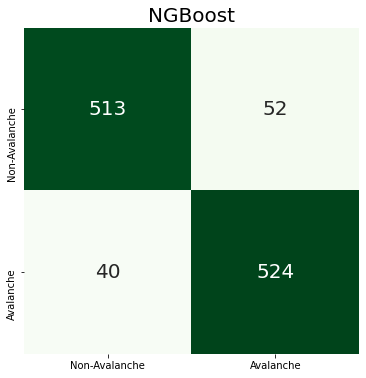

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_NGB = NGB.predict(X_test)
df_cm_NGB= pd.DataFrame(confusion_matrix(y_test,y_pred_NGB), index = [i for i in ["Non-Avalanche",  'Avalanche']], columns = [i for i in ["Non-Avalanche",  'Avalanche']])
fig = plt.figure(figsize=(6, 6))
plt.title('NGBoost', size=20)
sns.heatmap(df_cm_NGB, annot = True, fmt='g', cmap='Greens', cbar=False, annot_kws={"size": 20})
fig.savefig('conf_NGB.png', dpi=200,bbox_inches='tight')

print(classification_report(y_test,y_pred_NGB)) 
print("accuracy NGB: ", accuracy_score(y_test,y_pred_NGB)) 
print("precision NGB: ", precision_score(y_test,y_pred_NGB)) 
print("recall NGB: ", recall_score(y_test,y_pred_NGB)) 
print("f1 score NGB: ", f1_score(y_test,y_pred_NGB)) 

In [26]:
y_pred_prob_NGB = NGB.predict_proba(X_test)[:,1]
fpr_NGB, tpr_NGB, thresholds_NGB = roc_curve(y_test, y_pred_prob_NGB)
roc_auc_NGB = auc(fpr_NGB, tpr_NGB)

### ROC Curves

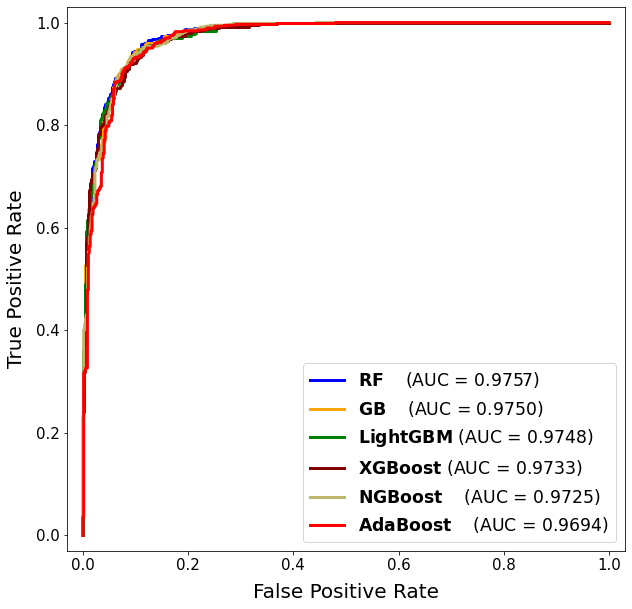

In [28]:
plt.figure(figsize=(10,10))
plt.plot(fpr_RFC, tpr_RFC, label=r'$\bf{}$'.format('RF')+ '    (AUC = %0.4f)' % roc_auc_RFC, color='b', linewidth=3)
plt.plot(fpr_GB, tpr_GB, label=r'$\bf{}$'.format('GB')+ '    (AUC = %0.4f)' % roc_auc_GB,  color='orange', linewidth=3)
plt.plot(fpr_LGB, tpr_LGB, label=r'$\bf{}$'.format('LightGBM')+ ' (AUC = %0.4f)' % roc_auc_LGB, color='g', linewidth=3)
plt.plot(fpr_XGB, tpr_XGB, label=r'$\bf{}$'.format('XGBoost')+ ' (AUC = %0.4f)' % roc_auc_XGB, color='maroon', linewidth=3)
plt.plot(fpr_NGB, tpr_NGB, label=r'$\bf{}$'.format('NGBoost')+ '    (AUC = %0.4f)' % roc_auc_NGB,  color='darkkhaki', linewidth=3)
plt.plot(fpr_AB, tpr_AB, label=r'$\bf{}$'.format('AdaBoost')+ '    (AUC = %0.4f)' % roc_auc_AB, color='r', linewidth=3)

plt.xlabel('False Positive Rate', size=20, labelpad=10)
plt.ylabel('True Positive Rate', size=20, labelpad=10)
plt.legend(loc='lower right',
          fancybox=True, shadow=False, ncol=1,fontsize='xx-large')
plt.xlim(-0.03,1.03)
plt.ylim(-0.03,1.03)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tick_params(labeltop=False, labelright=False)
plt.savefig('ROC.jpg', dpi=400)
plt.show()